# Dataset1 (fifa.csv)

## Statistical Description

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import hypergeom

fifa_read = pd.read_csv('fifa.csv')
fifa_read

print("-------------------------------------------------------")
print("Minimum Age        : ", fifa_read['Age'].min())
print("Maximum Age        : ", fifa_read['Age'].max())
print("Mean               : ", fifa_read['Age'].mean())
print("Median             : ", fifa_read['Age'].median())
print("Variance           : ", fifa_read['Age'].var())
print("Standard Deviation : ", fifa_read['Age'].std())
print("Skewness           : ", fifa_read['Age'].skew())
print("Kurtosis           : ", fifa_read['Age'].kurt())
print("Mode               : ", fifa_read['Age'].mode())
print("-------------------------------------------------------\n")

-------------------------------------------------------
Minimum Age        :  16
Maximum Age        :  45
Mean               :  25.122205745043114
Median             :  25.0
Variance           :  21.808364946571594
Standard Deviation :  4.66994271341433
Skewness           :  0.3917641387687474
Kurtosis           :  -0.4595135539307731
Mode               :  0    21
dtype: int64
-------------------------------------------------------



## Histogram

Text(0,0.5,'Total Players')

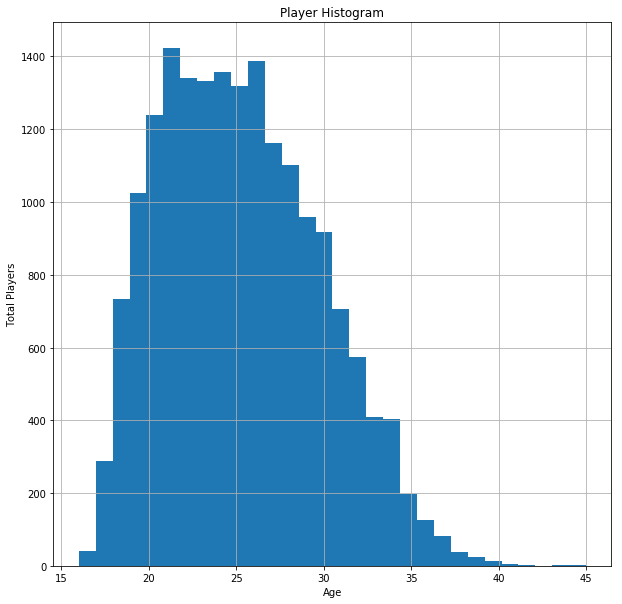

In [12]:
fifa_read.hist(column='Age', bins = 30, figsize = (10,10))
plt.title('Player Histogram')
plt.xlabel('Age')
plt.ylabel('Total Players')

## Box Plot

Text(0,0.5,'Current Age')

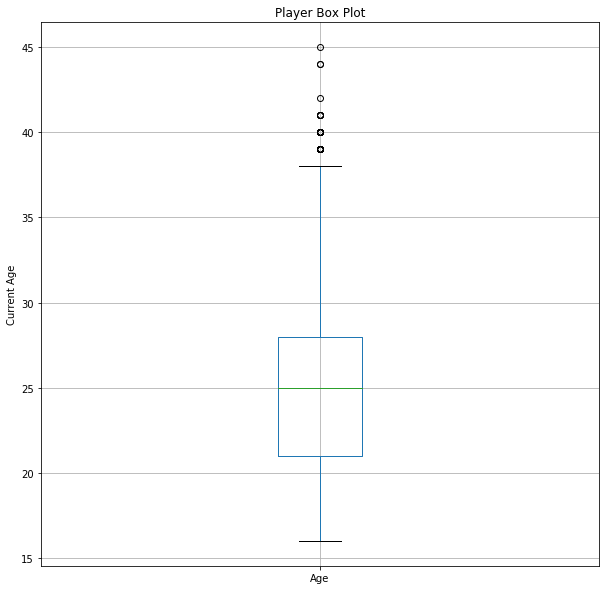

In [13]:
fifa_read.boxplot(column='Age', figsize = (10,10), grid = True)
plt.title('Player Box Plot')
plt.ylabel('Current Age')

## Pemilihan Distribusi

#### Pemilihan teknik distribusi hypergeometric dipilih karena penghitungan probabilitas untuk data yang diobservasi terhadap suatu kategori tidaklah independen (Pemain A, apabila sudah terpilih untuk masuk ke dalam team, tidak mungkin bisa dipilih/terpilih kembali untuk masuk ke dalam team). Selain itu, perhitungan distribusi dengan cara ini tidaklah membutuhkan pengganti.

## Jawaban Pertanyaan A 

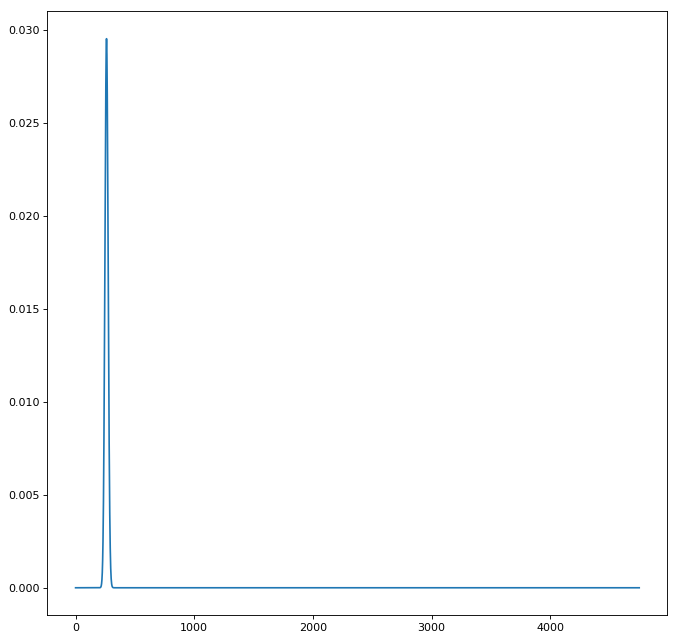

In [14]:
from scipy.stats import hypergeom
[JumlahPemain, under22, Sample] = [18207, 4750, 1000]
distribusiA = hypergeom(JumlahPemain , under22 ,Sample)

x = np.arange(0, n+1)
pmf_players = distribusiA.pmf(x)

fig = plt.figure(figsize=(10,10), dpi=80)
ax = fig.add_subplot(111)
ax.plot(x, pmf_players)

In [36]:
total_players = fifa_read['Age'].count()

lessThan22_count = fifa_read[fifa_read.Age < 22].shape
total_lessThan22_count = lessThan22_count[0]
lessThan22_chance = (total_lessThan22_count / total_players)*1000

print("Ekspektasi pemain bola yang berumur kurang dari 22 tahun : ", lessThan22_chance.round())

Ekspektasi pemain bola yang berumur kurang dari 22 tahun :  261.0


## Jawaban Pertanyaan B 

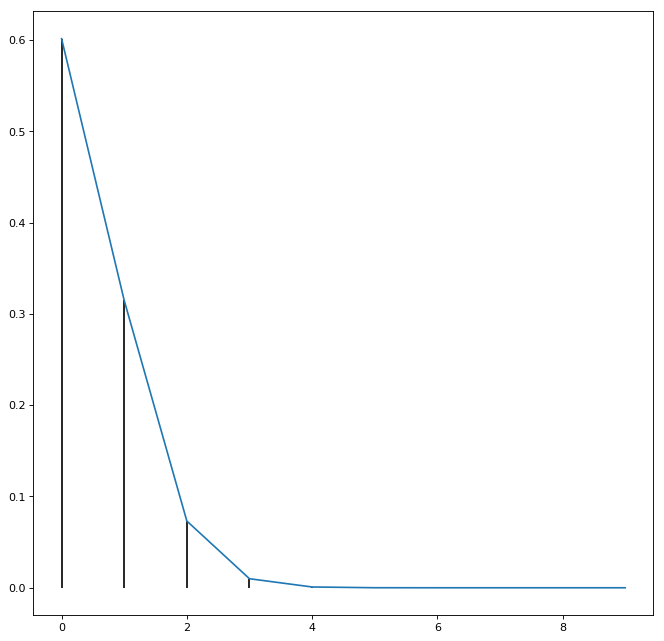

In [39]:
from scipy.stats import hypergeom
[JumlahPemain, Above40, Sample] = [18207, 9, 1000]
distribusi = hypergeom(JumlahPemain, Above40, Sample)
x = np.arange(0, Above40+1)
pmf_players = distribusi.pmf(x)

fig = plt.figure(figsize=(10,10), dpi=80)
histogram = fig.add_subplot(111)
histogram.plot(x, pmf_players)
histogram.vlines(x, 0, pmf_players)

In [40]:
moreThan40_count = fifa_read[fifa_read.Age > 40].shape
total_moreThan40_count = moreThan40_count[0]
moreThan40_chance = (total_moreThan40_count / total_players)*1000

print("Ekspektasi pemain bola yang berumur lebih  dari 40 tahun : ", moreThan40_chance.round())

Ekspektasi pemain bola yang berumur lebih  dari 40 tahun :  0.0


# Dataset3 (black_friday.csv)

## Statistical Description

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
black_friday_read = pd.read_csv('black_friday.csv', header = None)
black_friday_read.columns = ['Spent']
print("-------------------------------------------------------")
#black_friday_read[0] == kolom dengan nama 0 (setelah diset none)
print("Minimum Purchase   : ", black_friday_read['Spent'].min())
print("Maximum Purchase   : ", black_friday_read['Spent'].max())
print("Mean               : ", black_friday_read['Spent'].mean())
print("Median             : ", black_friday_read['Spent'].median())
print("Variance           : ", black_friday_read['Spent'].var())
print("Standard Deviation : ", black_friday_read['Spent'].std())
print("Skewness           : ", black_friday_read['Spent'].skew())
print("Kurtosis           : ", black_friday_read['Spent'].kurt())
print("Mode               : ", black_friday_read['Spent'].mode())
print("-------------------------------------------------------")

-------------------------------------------------------
Minimum Purchase   :  185
Maximum Purchase   :  23961
Mean               :  9333.859852635065
Median             :  8062.0
Variance           :  24810581.48601374
Standard Deviation :  4981.022132656483
Skewness           :  0.6242797316083074
Kurtosis           :  -0.34312137256836284
Mode               :  0    6855
dtype: int64
-------------------------------------------------------


## Histogram

Text(0,0.5,'Amount of people')

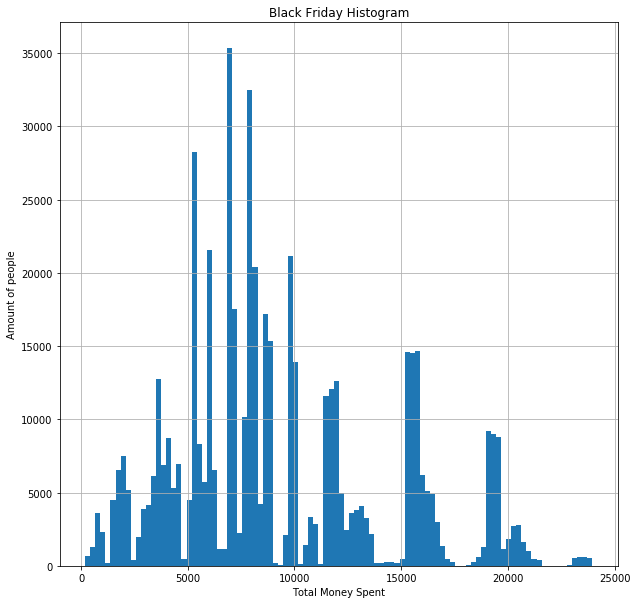

In [68]:
black_friday_read.hist(column=['Spent'], bins = 100, figsize = (10,10))
plt.title('Black Friday Histogram')
plt.xlabel('Total Money Spent')
plt.ylabel('Amount of people')

## Box Plot

Text(0,0.5,'Amount of money spent')

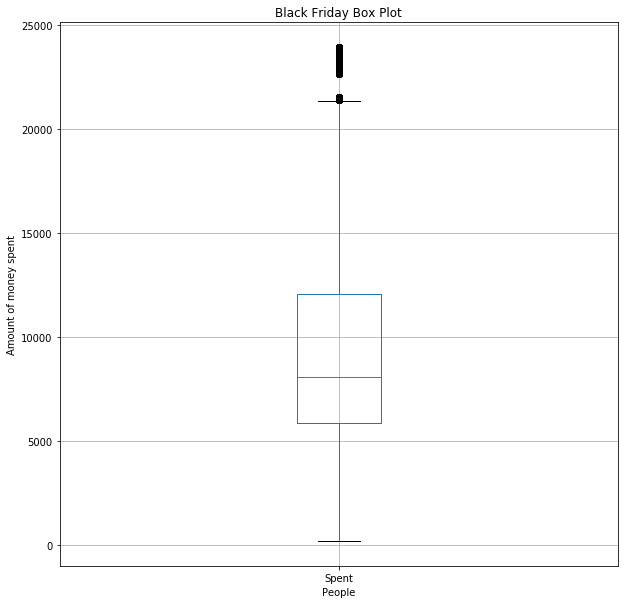

In [69]:
black_friday_read.boxplot(grid = True, figsize = (10,10))
plt.title('Black Friday Box Plot')
plt.xlabel('People')
plt.ylabel('Amount of money spent')

## Fungsi Distribusi yang Paling Sesuai

#### Fungsi distribusi peluang yang paling sesuai adalah Distribusi Hypergeometrik. Alasannya adalah dalam distribusi hypergeometrik, ketika menghitung probabilitas, sampel diambil dari populasi terbatas tanpa penggantian. Contohnya ketika mengambil 20 sampel orang secara random dari dataset ini dan ingin dicari jumlah orang dengan pembelian kurang dari 1000 dolar, sampel akan diambil satu per satu namun tidak akan dikembalikan sebelum jumlah orang dengan pembelian kurang dari 1000 dolar di antara 20 sampel orang ditemukan.

## Jawaban Pertanyaan A

### i. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, ekspektasi jumlah orang yang miskin (total pembelian kurang dari 1000 dolar):

In [71]:
totalnum_people = black_friday_read['Spent'].count()

lessThan1000_count = black_friday_read[black_friday_read.Spent < 1000].shape
total_lessThan1000_count = lessThan1000_count[0]
lessThan1000_chance = total_lessThan1000_count / totalnum_people

print("Ekspektasi jumlah orang yang miskin =", (lessThan1000_chance*250).round())

Ekspektasi jumlah orang yang miskin = 3.0


### ii. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, ekspektasi jumlah orang yang kaya (total pembelian lebih dari 10000 dolar):

In [72]:
moreThan10000_count = black_friday_read[black_friday_read.Spent > 10000].shape
total_moreThan10000_count = moreThan10000_count[0]
moreThan10000_chance = total_moreThan10000_count / totalnum_people

print("Ekspektasi jumlah orang yang Kaya =",(moreThan10000_chance*250).round())

Ekspektasi jumlah orang yang Kaya = 87.0


### iii. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, ekspektasi jumlah orang yang crazy rich (total pembelian lebih dari 20000 dolar)

In [73]:
moreThan20000_count = black_friday_read[black_friday_read.Spent > 20000].shape
total_moreThan20000_count = moreThan20000_count[0]
moreThan20000_chance = total_moreThan20000_count / totalnum_people

print("Ekspektasi jumlah orang yang Crazy Rich =",(moreThan20000_chance*250).round())

Ekspektasi jumlah orang yang Crazy Rich = 6.0


## Jawaban Pertanyaan B

### i. Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, ekspektasi jumlah orang yang sebenarnya pengeluarannya sama dengan membeli Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif):

In [75]:
below_2000_count = black_friday_read[black_friday_read.Spent <= 2000].shape
below_1980_count = black_friday_read[black_friday_read.Spent < 1980].shape
total_below_2000_count = below_2000_count[0]
total_below_1980_count = below_1980_count[0]
between_1980_2000_chance = (total_below_2000_count - total_below_1980_count) / totalnum_people

print("Ekspektasi jumlah orang yang pengeluarannya sama dengan membeli Galaxy Fold =",(between_1980_2000_chance*1000).round())

Ekspektasi jumlah orang yang pengeluarannya sama dengan membeli Galaxy Fold = 1.0


### ii. Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, ekspektasi jumlah orang yang sebenarnya pengeluarannya sama dengan membeli MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif):

In [76]:
below_2897_count = black_friday_read[black_friday_read.Spent <= 2897].shape
below_2707_count = black_friday_read[black_friday_read.Spent < 2707].shape
total_below_2897_count = below_2897_count[0]
total_below_2707_count = below_2707_count[0]
between_2707_2897_chance = (total_below_2897_count - total_below_2707_count) / totalnum_people

print("Ekspektasi jumlah orang yang pengeluarannya sama dengan membeli MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 =",(between_2707_2897_chance*1000).round())

Ekspektasi jumlah orang yang pengeluarannya sama dengan membeli MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 = 7.0


# Dataset4 (crypto.csv)

## Statistical Description

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
crypto_read = pd.read_csv('crypto.csv', header = None)
crypto_read.columns = ['Value']
crypto_read

print("-------------------------------------------------------")
#crypto_read[0] == kolom dengan nama 0 (setelah diset none)
print("Minimum Value      : ", crypto_read['Value'].min())
print("Maximum Value      : ", crypto_read['Value'].max())
print("Mean               : ", crypto_read['Value'].mean())
print("Mode               : ", crypto_read['Value'].mode())
print("Median             : ", crypto_read['Value'].median())
print("Variance           : ", crypto_read['Value'].var())
print("Standard Deviation : ", crypto_read['Value'].std())
print("Skewness           : ", crypto_read['Value'].skew())
print("Kurtosis           : ", crypto_read['Value'].kurt())
print("-------------------------------------------------------")

-------------------------------------------------------
Minimum Value      :  2.9249999999999997e-09
Maximum Value      :  2383502.5
Mean               :  203.01814563577602
Mode               :  0    0.000002
dtype: float64
Median             :  0.0097335
Variance           :  75320415.21220845
Standard Deviation :  8678.733502776107
Skewness           :  118.23960755632972
Kurtosis           :  22297.470842872517
-------------------------------------------------------


## Histogram

Text(0,0.5,'Number')

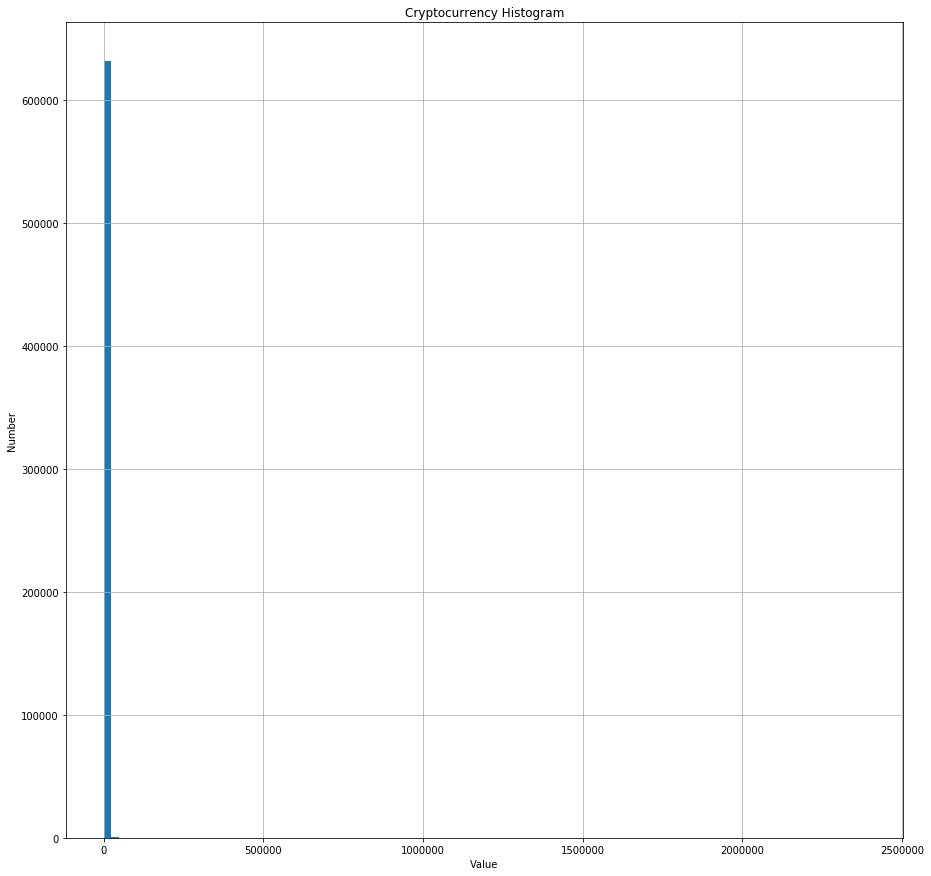

In [79]:
crypto_read.hist(column = ['Value'], bins = 100, figsize = (15,15))
plt.title('Cryptocurrency Histogram')
plt.xlabel('Value')
plt.ylabel('Number')

## Box Plot

Text(0,0.5,'Number')

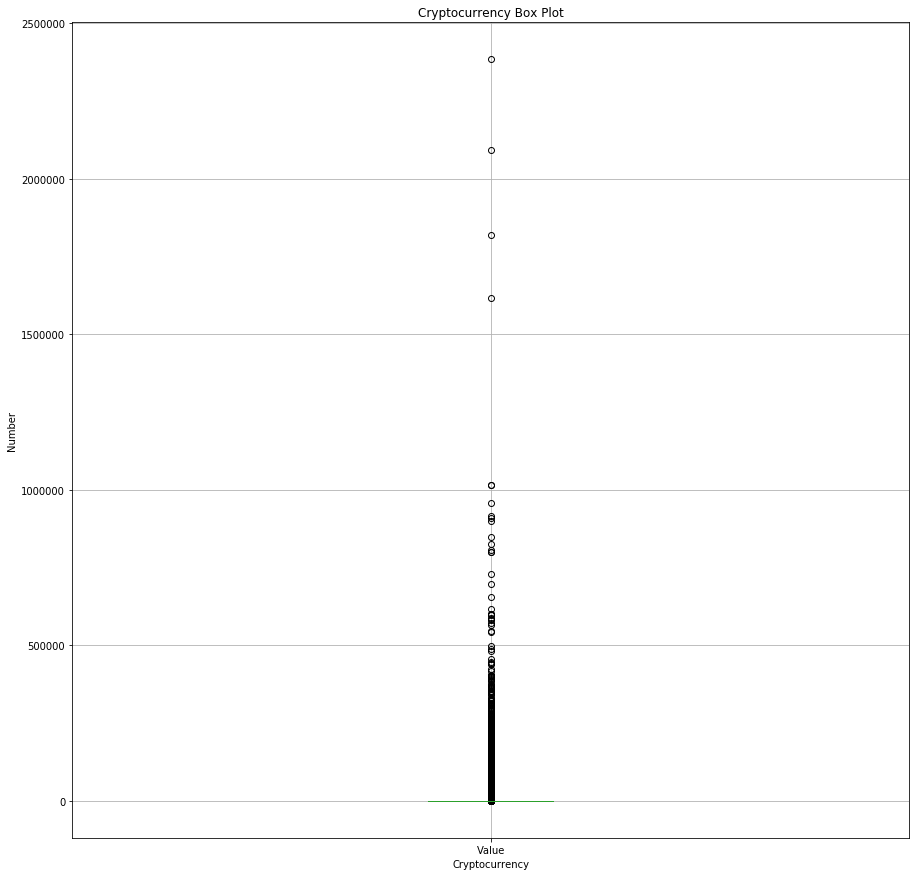

In [82]:
crypto_read.boxplot(figsize = (15,15), grid = True)
plt.title('Cryptocurrency Box Plot')
plt.xlabel('Cryptocurrency')
plt.ylabel('Number')

## Fungsi Distribusi yang Paling Sesuai

#### Fungsi distribusi peluang yang paling sesuai adalah Disribusi Gamma. Alasannya adalah, jika dilihat dari histogram, jumlah datanya besar di angka mendekati 0, lalu turun drastis, serta semakin besar datanya, semakin kecil jumlah datanya, dan hal tersebut mirip dengan representasi distribusi gamma. Selain itu, distribusi kontinu lain adalah turunan dari distribusi gamma, sehingga lebih tepat memakai gamma.  Selain itu juga, gamma lebih mudah untuk diterapkan karena hanya menggunakan alpha dan beta saja, yang dapat diturunkan dengan mudah dari mean dan variance.

## Jawaban Pertanyaan A

### i. Apabila hari ini terdapat 1000 data harga cryptocurrency baru, ekspektasi jumlah cryptocurrency yang nilainya kurang dari 0.177013 adalah:

In [85]:
from scipy.stats import gamma
variance = crypto_read['Value'].var()
mean = crypto_read['Value'].mean()
beta = variance/mean
alpha = mean/beta

lessThan0_177013 = gamma.cdf(0.177013, alpha, scale = beta)
print("Ekspektasi jumlah cryptocurrency yang nilainya kurang dari 0.177013 =", round(lessThan0_177013*1000))

Ekspektasi jumlah cryptocurrency yang nilainya kurang dari 0.177013 = 992.0


### ii. Apabila hari ini terdapat 1000 data harga cryptocurrency baru, tentukan ekspektasi jumlah cryptocurrency yang nilainya lebih dari 177.013 adalah:

In [86]:
lessThan177_013 = gamma.cdf(177.013, alpha, scale = beta)
moreThan177_013 = 1 - lessThan177_013
print("Ekspektasi jumlah cryptocurrency yang nilainya lebih dari 177.013 =",round(moreThan177_013*1000))

Ekspektasi jumlah cryptocurrency yang nilainya lebih dari 177.013 = 4.0


## Jawaban Pertanyaan B

###  i. Jika suatu hari terdapat sebuah cryptocurrency baru, peluang cryptocurrency tersebut bernilai lebih dari 0.013 adalah:

In [88]:
lessThan0_013 = gamma.cdf(0.013, alpha, scale = beta)
moreThan0_013 = 1 - lessThan0_013
print("Peluang cryptocurrency baru bernilai lebih dari 0.013 =", moreThan0_013)

Peluang cryptocurrency baru bernilai lebih dari 0.013 = 0.009037196715190765


### ii. Jika suatu hari terdapat sebuah cryptocurrency baru, peluang cryptocurrency tersebut bernilai kurang dari 17.7 adalah:

In [89]:
lessThan17_7 = gamma.cdf(17.7, alpha, scale = beta)
print("Peluang cryptocurrency baru bernilai kurang dari 17.7 =",lessThan17_7)

Peluang cryptocurrency baru bernilai kurang dari 17.7 = 0.9948837242503569


# Dataset5 (athletes.csv)

## Statistical Description

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

athletes_read = pd.read_csv('athletes.csv')
athletes_read

print("-------------------------------------------------------")
print("Minimum Medal      : ", athletes_read['Medal'].min())
print("Maximum Medal      : ", athletes_read['Medal'].max())
print("Mean               : ", athletes_read['Medal'].mean())
print("Median             : ", athletes_read['Medal'].median())
print("Variance           : ", athletes_read['Medal'].var())
print("Standard Deviation : ", athletes_read['Medal'].std())
print("Skewness           : ", athletes_read['Medal'].skew())
print("Kurtosis           : ", athletes_read['Medal'].kurt())
print("Mode               : ", athletes_read['Medal'].mode())
print("-------------------------------------------------------")

-------------------------------------------------------
Minimum Medal      :  0
Maximum Medal      :  28
Mean               :  0.2952772561622789
Median             :  0.0
Variance           :  0.5252132778008305
Standard Deviation :  0.724715998030146
Skewness           :  4.8199987845312
Kurtosis           :  51.562525836059855
Mode               :  0    0
dtype: int64
-------------------------------------------------------


## Histogram

Text(0,0.5,'Amount of Player')

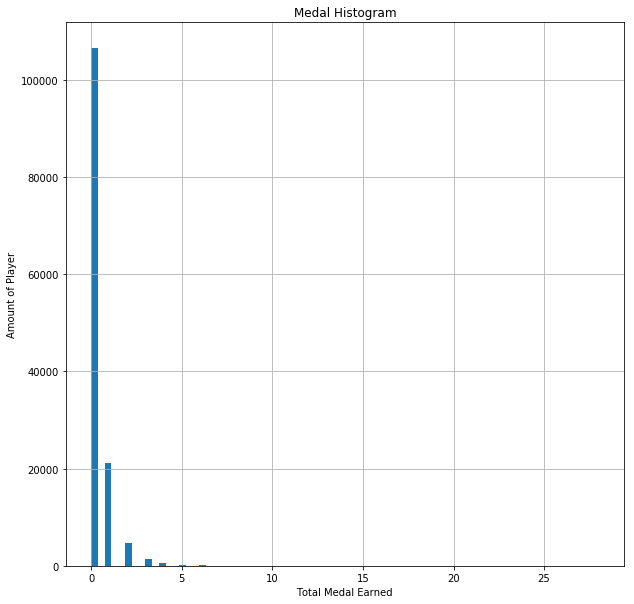

In [48]:
athletes_read.hist(column='Medal', bins = 75, figsize = (10,10))
plt.title('Medal Histogram')
plt.xlabel('Total Medal Earned')
plt.ylabel('Amount of Player')

## Box Plot

Text(0,0.5,'Total Medal Earned')

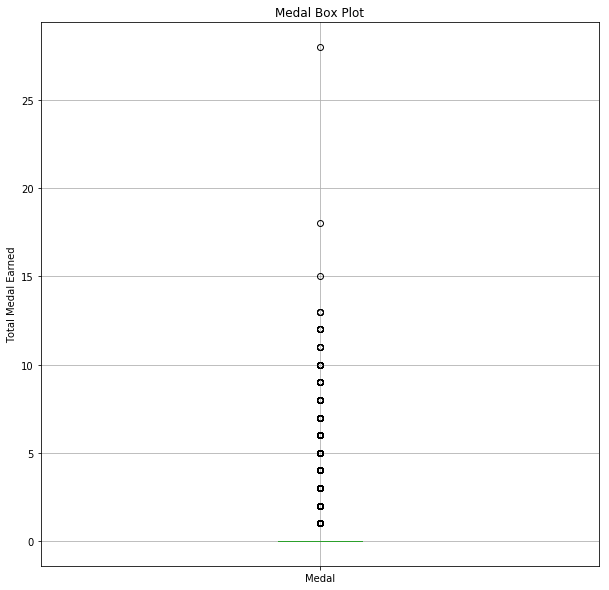

In [49]:
athletes_read.boxplot(column='Medal', grid = True, figsize = (10,10))
plt.title('Medal Box Plot')
plt.ylabel('Total Medal Earned')

## Pemilihan Distribusi

#### Pemilihan teknik distribusi bernoulli dipilih karena (sebagai contoh, kemungkinan untuk mendapat 0 medali hanya ya atau tidak, kemungkinan untuk mendapat 3 medali hanya ya atau tidak, dst) dalam kasus ini hanya terdapat 2 kemungkinan keluaran, yakni benar atau salah. Alasan lainnya yakni, tidak dimungkinkan Y mendapat medali dengan jumlah 0.0012 atau mendapat medali dengan jumlah desimal lainnya.

## Jawaban Persoalan A

In [62]:
noMedal_count = athletes_read[athletes_read.Medal == 0].shape
withMedal_count = athletes_read[athletes_read.Medal != 0].shape
moreThan10_count = athletes_read[athletes_read.Medal > 10].shape
exact3Medals_count = athletes_read[athletes_read.Medal == 3].shape
exact1Medal_count = athletes_read[athletes_read.Medal == 1].shape
exact5Medals_count = athletes_read[athletes_read.Medal == 5].shape

total = noMedal_count[0] + withMedal_count[0]

noMedal_chance = noMedal_count[0] / total
moreThan10_chance = moreThan10_count[0] / total
exact3Medals_chance = exact3Medals_count[0] / total
exact1Or5Medals_chance = (exact1Medal_count[0] + exact5Medals_count[0]) / total

print("Peluang Y meraih tepat 0 medali       : ", round(noMedal_chance,5))
print("Peluang Y meraih lebih dari 10 medali : ", round(moreThan10_chance,5))
print("Peluang Y meraih tepat 3 medali       : ", round(exact3Medals_chance,5))
print("Peluang Y meraih 1 atau 5 medali      : ", round(exact1Or5Medals_chance,5))

Peluang Y meraih tepat 0 medali       :  0.79068
Peluang Y meraih lebih dari 10 medali :  0.00016
Peluang Y meraih tepat 3 medali       :  0.01028
Peluang Y meraih 1 atau 5 medali      :  0.15884


## Jawaban Persoalan B

In [66]:
z_critical = stats.norm.ppf(q = 0.975)                       
margin_of_error = z_critical * ((athletes_read['Medal'].std()/math.sqrt(total)))

confidence_interval = (athletes_read['Medal'].mean() - margin_of_error, athletes_read['Medal'].mean() + margin_of_error)  

print("Confidence interval                   : ", confidence_interval,5)

Confidence interval                   :  (0.29140751272097853, 0.29914699960357927) 5
